In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# Vizu settings
%matplotlib inline
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['text.usetex'] = True
plt.style.use('seaborn-whitegrid')

In [2]:
db = pd.read_csv('trends/db_4.csv')
db['date'] = pd.to_datetime(db['date'])
# Find missing dates
db.sort_values(by='date', inplace=True)
db.dropna(inplace=True)
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292160 entries, 0 to 292159
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           292160 non-null  datetime64[ns]
 1   country        292160 non-null  object        
 2   Depression     292160 non-null  float64       
 3   Therapy        292160 non-null  float64       
 4   Bullying       292160 non-null  float64       
 5   Stress         292160 non-null  float64       
 6   Mental Health  292160 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 17.8+ MB


In [30]:
# Only country = France, USA, Germany, Spain, Italy
SELECT = ["Norway", "Sweden", "Denmark"]
select_db = db[db['country'].isin(SELECT)]

In [31]:
select_db.head()

,date,country,Depression,Therapy,Bullying,Stress,Mental Health
62,2010-01-01,Norway,0.0,0.0,0.0,18.0,0.0
17,2010-01-01,Denmark,66.0,0.0,0.0,44.0,0.0
6,2010-01-01,Sweden,38.0,15.0,0.0,38.0,0.0
155,2010-01-02,Sweden,62.0,7.0,0.0,35.0,0.0
147,2010-01-02,Norway,0.0,0.0,0.0,0.0,0.0


In [41]:
plt.rcParams['figure.figsize']= (20, 10)
plt.rcParams['font.size'] = 16
plt.rcParams['figure.dpi'] = 100

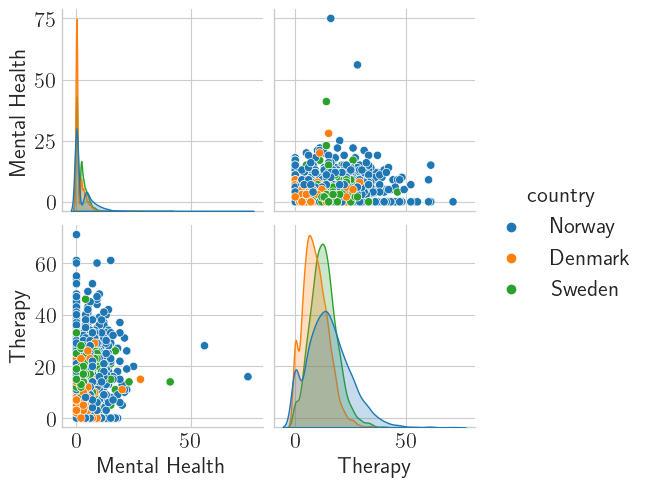

In [42]:
sns.pairplot(select_db, hue="country", vars=['Mental Health', 'Therapy'])

In [80]:
db.tail()

,date,country,Depression,Therapy,Bullying,Stress,Mental Health
292102,2019-12-31,United States,30.0,75.0,2.0,20.0,17.0
292101,2019-12-31,Russia,16.0,31.0,0.0,22.0,9.0
292099,2019-12-31,Saudi Arabia,24.0,33.0,4.0,20.0,8.0
292118,2019-12-31,Brazil,2.0,3.0,3.0,8.0,1.0
292159,2019-12-31,Venezuela,0.0,0.0,0.0,14.0,7.0


In [38]:
dbUS = db[db['country'] == 'United States']

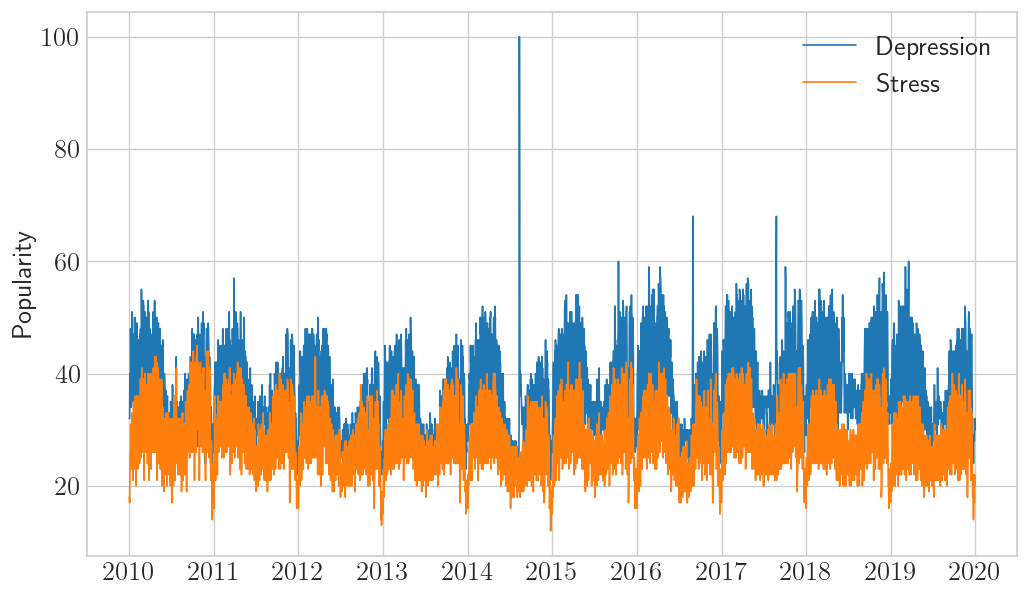

In [39]:
# reduce line width
plt.rcParams['lines.linewidth'] = 1
plt.figure(figsize=(10, 6), dpi=120)
plt.plot(dbUS["date"], dbUS["Depression"])
plt.plot(dbUS["date"], dbUS["Stress"])
plt.legend(['Depression', 'Stress'])
plt.ylabel('Popularity')
plt.show()

<AxesSubplot:>

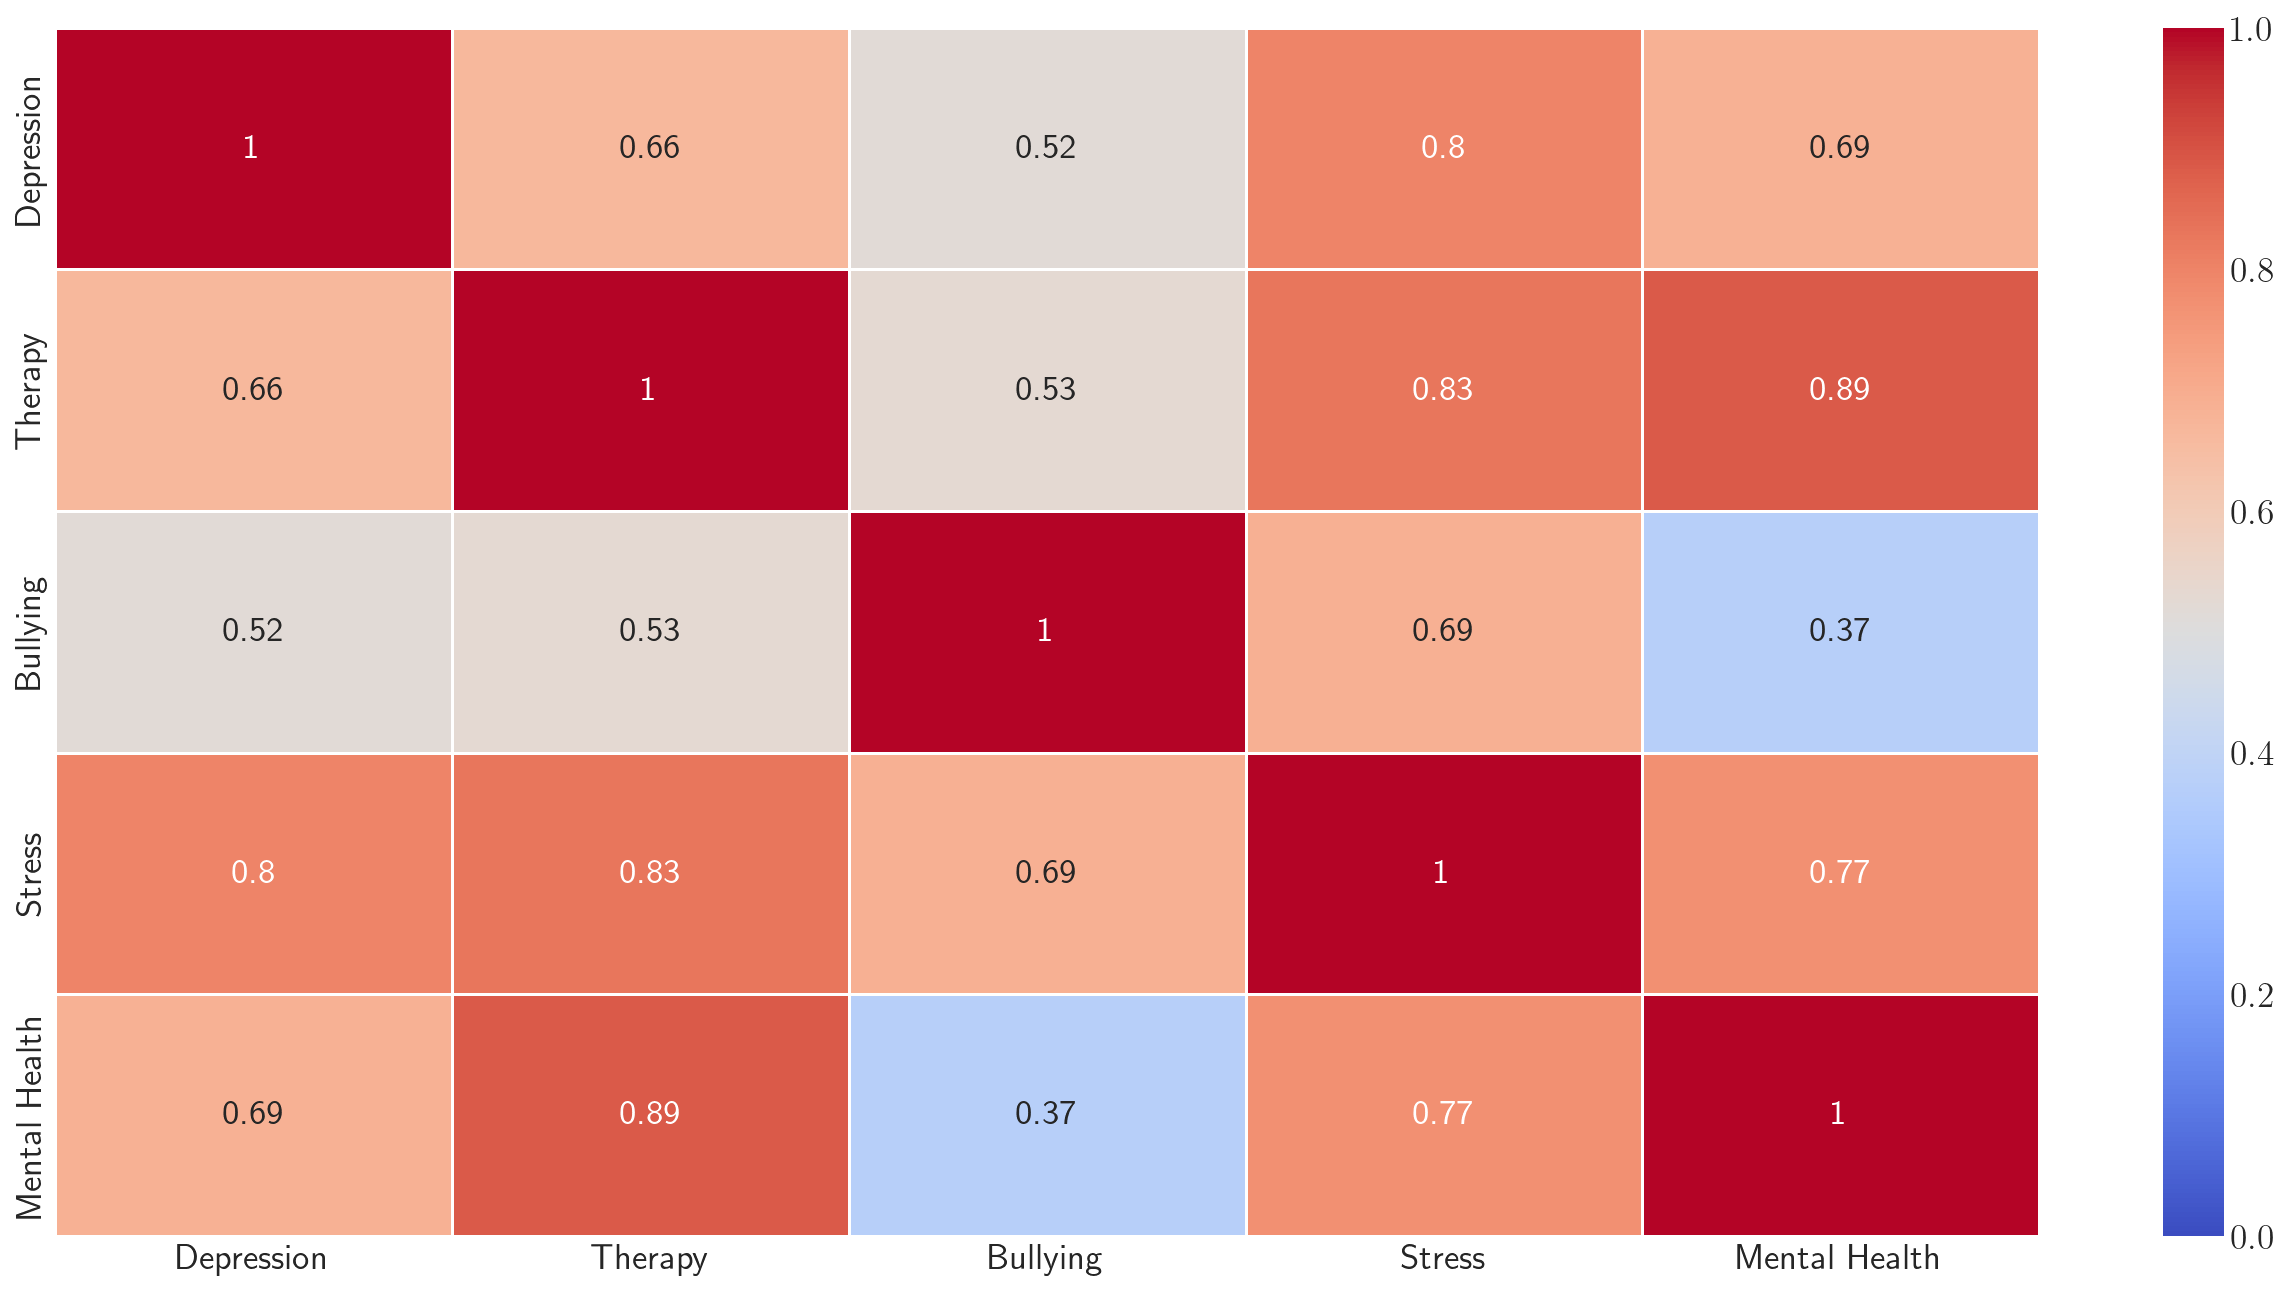

In [40]:
sns.heatmap(dbUS.corr(), annot=True, cmap='coolwarm', linewidths=0.5, vmin=0, vmax=1)
